<a href="https://colab.research.google.com/github/MerciH/big_data_google_collab/blob/main/Exercise_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 6 : Clustering using kMeans

### Step 1 : Read sampleDataset.csv provided

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("sampleDataSet.csv")
df

,Unnamed: 0,TimeStamp,(140.7468006 41.8188869),(140.4396435 40.5942053),(141.7627117 40.1916885),(140.8733429 38.2932172),(140.957261 37.6422006),(140.5346664 36.3965854),(140.4021967 36.555081),(139.9744275 35.9510748),...,(135.790301 34.509211),(135.7079001 34.6916695),(133.7758944 34.6007931),(133.9318657 34.4600964),(134.2940462 34.7473902),(132.5621196 34.233441),(132.2165637 34.1698473),(130.601994 32.507843),(130.6384926 32.5010333),(127.7235186 26.2674837)
0,0,2022-04-01 01:00:00,9.0,NaN,NaN,NaN,3.0,NaN,6.0,NaN,...,5.0,7.0,NaN,2.0,8.0,4.0,NaN,NaN,NaN,NaN
1,1,2022-04-01 02:00:00,0.0,NaN,NaN,NaN,0.0,NaN,8.0,NaN,...,4.0,8.0,NaN,2.0,6.0,3.0,NaN,NaN,NaN,NaN
2,2,2022-04-01 03:00:00,2.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,8.0,3.0,NaN,2.0,11.0,4.0,NaN,NaN,NaN,NaN
3,3,2022-04-01 04:00:00,4.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,...,8.0,3.0,NaN,1.0,11.0,5.0,NaN,NaN,NaN,NaN
4,4,2022-04-01 05:00:00,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,5.0,4.0,NaN,1.0,8.0,5.0,NaN,NaN,NaN,NaN
5,5,2022-04-01 06:00:00,-1.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,...,5.0,1.0,NaN,1.0,4.0,7.0,NaN,NaN,NaN,NaN
6,6,2022-04-01 07:00:00,6.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,...,8.0,-1.0,NaN,2.0,7.0,6.0,NaN,NaN,NaN,NaN
7,7,2022-04-01 08:00:00,10.0,NaN,NaN,NaN,4.0,NaN,3.0,NaN,...,6.0,2.0,NaN,3.0,-2.0,6.0,NaN,NaN,NaN,NaN
8,8,2022-04-01 09:00:00,3.0,NaN,NaN,NaN,0.0,NaN,4.0,NaN,...,6.0,3.0,NaN,5.0,-4.0,5.0,NaN,NaN,NaN,NaN
9,9,2022-04-01 10:00:00,6.0,NaN,NaN,NaN,9.0,NaN,4.0,NaN,...,8.0,-1.0,NaN,13.0,13.0,NaN,NaN,NaN,NaN,NaN


### Step 2 : Check percentage of missing values in each column and drop the columns with missing pixels percentage greater than 95%

In [2]:
# Calculate the percentage of missing values in each column
missing_percent = (df.isnull().sum() / len(df)) * 100
print("missing percent")
print(missing_percent)

# Create a list of columns to drop (those with missing percentage greater than 95%)
columns_to_drop = missing_percent[missing_percent > 95].index.tolist()

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

print("after dropping the columns")
# columns_to_drop
df

missing percent
Unnamed: 0                           0.0
TimeStamp                            0.0
(140.7468006 41.8188869)             0.0
(140.4396435 40.5942053)           100.0
(141.7627117 40.1916885)           100.0
(140.8733429 38.2932172)           100.0
(140.957261 37.6422006)             12.5
(140.5346664 36.3965854)           100.0
(140.4021967 36.555081)              5.0
(139.9744275 35.9510748)           100.0
(139.7422865 36.2305774)           100.0
(139.0960211 36.4047323)           100.0
(138.9138437 36.323256)            100.0
(139.1103334 36.2974922)             0.0
(139.7638423 35.93410739999999)    100.0
(139.2619009 36.0594871)           100.0
(140.138552 35.611391)               0.0
(139.993363 35.6771308)              0.0
(139.9382318 35.374032)              0.0
(140.1460666 35.3335387)           100.0
(139.6624281 35.4151966)           100.0
(139.3678037 35.4666052)             0.0
(139.466145 35.4718748)              2.5
(139.3908038 35.446427)              0.0


,Unnamed: 0,TimeStamp,(140.7468006 41.8188869),(140.957261 37.6422006),(140.4021967 36.555081),(139.1103334 36.2974922),(140.138552 35.611391),(139.993363 35.6771308),(139.9382318 35.374032),(139.3678037 35.4666052),...,(138.5998848 35.1758502),(137.7915988 34.7918944),(136.8127001 35.1404408),(135.0986062 34.6935289),(134.7906399 34.7659515),(135.790301 34.509211),(135.7079001 34.6916695),(133.9318657 34.4600964),(134.2940462 34.7473902),(132.5621196 34.233441)
0,0,2022-04-01 01:00:00,9.0,3.0,6.0,5.0,4.0,3.0,5.0,8.0,...,0.0,6.0,5.0,10.0,3.0,5.0,7.0,2.0,8.0,4.0
1,1,2022-04-01 02:00:00,0.0,0.0,8.0,10.0,-4.0,0.0,6.0,6.0,...,0.0,3.0,5.0,11.0,4.0,4.0,8.0,2.0,6.0,3.0
2,2,2022-04-01 03:00:00,2.0,NaN,7.0,-2.0,2.0,2.0,5.0,4.0,...,4.0,3.0,-2.0,15.0,2.0,8.0,3.0,2.0,11.0,4.0
3,3,2022-04-01 04:00:00,4.0,NaN,9.0,1.0,1.0,4.0,1.0,3.0,...,-2.0,4.0,3.0,8.0,1.0,8.0,3.0,1.0,11.0,5.0
4,4,2022-04-01 05:00:00,4.0,NaN,3.0,6.0,0.0,1.0,2.0,4.0,...,3.0,6.0,0.0,13.0,0.0,5.0,4.0,1.0,8.0,5.0
5,5,2022-04-01 06:00:00,-1.0,4.0,4.0,-8.0,3.0,3.0,1.0,4.0,...,1.0,7.0,0.0,8.0,1.0,5.0,1.0,1.0,4.0,7.0
6,6,2022-04-01 07:00:00,6.0,4.0,4.0,14.0,2.0,7.0,2.0,3.0,...,3.0,6.0,4.0,7.0,2.0,8.0,-1.0,2.0,7.0,6.0
7,7,2022-04-01 08:00:00,10.0,4.0,3.0,-1.0,6.0,5.0,4.0,3.0,...,-1.0,8.0,-3.0,7.0,2.0,6.0,2.0,3.0,-2.0,6.0
8,8,2022-04-01 09:00:00,3.0,0.0,4.0,-5.0,3.0,4.0,7.0,5.0,...,6.0,5.0,2.0,7.0,2.0,6.0,3.0,5.0,-4.0,5.0
9,9,2022-04-01 10:00:00,6.0,9.0,4.0,-3.0,2.0,5.0,3.0,4.0,...,2.0,5.0,4.0,8.0,3.0,8.0,-1.0,13.0,13.0,NaN


### Step 3 : Perform mean Imputation if missing values are present in the data

In [3]:
# # Initialize the imputers, by setting what values we want to impute and the strategy to use
# mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# # Fit the imputer on to the dataset
# mean_imputer = mean_imputer.fit(df)


# # Apply the imputation
# results = mean_imputer.transform(df.values)
# results.round()

for (columnName, columnData) in df.items():
  if df[columnName].dtype.kind in 'iufc':
      mean_imputation = df[columnName].mean()
      print(mean_imputation)
      # Fill missing values in the DataFrame with the mean values
      df.fillna(mean_imputation, inplace=True)
df

19.5
5.75
9.2875
6.45
3.65
5.825
5.625
9.1
6.725
7.7875
5.975
6.475
9.275
6.375
8.3
4.375
8.375
6.2
7.55
5.1625
5.075
8.3
15.8


,Unnamed: 0,TimeStamp,(140.7468006 41.8188869),(140.957261 37.6422006),(140.4021967 36.555081),(139.1103334 36.2974922),(140.138552 35.611391),(139.993363 35.6771308),(139.9382318 35.374032),(139.3678037 35.4666052),...,(138.5998848 35.1758502),(137.7915988 34.7918944),(136.8127001 35.1404408),(135.0986062 34.6935289),(134.7906399 34.7659515),(135.790301 34.509211),(135.7079001 34.6916695),(133.9318657 34.4600964),(134.2940462 34.7473902),(132.5621196 34.233441)
0,0,2022-04-01 01:00:00,9.0,3.0,6.0,5.0,4.0,3.0,5.0,8.0,...,0.0,6.0,5.0,10.0,3.0,5.0,7.0,2.0,8.0,4.0
1,1,2022-04-01 02:00:00,0.0,0.0,8.0,10.0,-4.0,0.0,6.0,6.0,...,0.0,3.0,5.0,11.0,4.0,4.0,8.0,2.0,6.0,3.0
2,2,2022-04-01 03:00:00,2.0,19.5,7.0,-2.0,2.0,2.0,5.0,4.0,...,4.0,3.0,-2.0,15.0,2.0,8.0,3.0,2.0,11.0,4.0
3,3,2022-04-01 04:00:00,4.0,19.5,9.0,1.0,1.0,4.0,1.0,3.0,...,-2.0,4.0,3.0,8.0,1.0,8.0,3.0,1.0,11.0,5.0
4,4,2022-04-01 05:00:00,4.0,19.5,3.0,6.0,0.0,1.0,2.0,4.0,...,3.0,6.0,0.0,13.0,0.0,5.0,4.0,1.0,8.0,5.0
5,5,2022-04-01 06:00:00,-1.0,4.0,4.0,-8.0,3.0,3.0,1.0,4.0,...,1.0,7.0,0.0,8.0,1.0,5.0,1.0,1.0,4.0,7.0
6,6,2022-04-01 07:00:00,6.0,4.0,4.0,14.0,2.0,7.0,2.0,3.0,...,3.0,6.0,4.0,7.0,2.0,8.0,-1.0,2.0,7.0,6.0
7,7,2022-04-01 08:00:00,10.0,4.0,3.0,-1.0,6.0,5.0,4.0,3.0,...,-1.0,8.0,-3.0,7.0,2.0,6.0,2.0,3.0,-2.0,6.0
8,8,2022-04-01 09:00:00,3.0,0.0,4.0,-5.0,3.0,4.0,7.0,5.0,...,6.0,5.0,2.0,7.0,2.0,6.0,3.0,5.0,-4.0,5.0
9,9,2022-04-01 10:00:00,6.0,9.0,4.0,-3.0,2.0,5.0,3.0,4.0,...,2.0,5.0,4.0,8.0,3.0,8.0,-1.0,13.0,13.0,19.5


### Step 4 :  Using Elbow k Means find best k value

The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:
**`WCSS= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3 distance(Pi C3)2 `**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

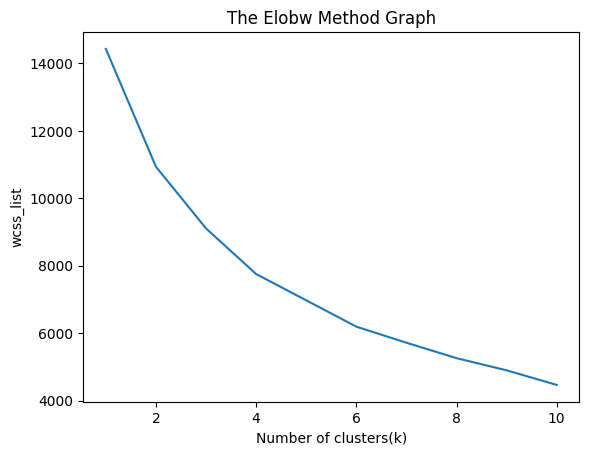

In [4]:
# extracting timeStamp and unnamed
import matplotlib.pyplot as plt
cl_to_drop = ['TimeStamp']
extracted_df = df.drop(columns=cl_to_drop)
# print(extracted_df)
extracted_df = extracted_df.loc[:, ~extracted_df.columns.str.contains('^Unnamed')]
# print(extracted_df)

#finding optimal number of clusters using the elbow method

from sklearn.cluster import KMeans

wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
      kmeans.fit(extracted_df)
      wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

### Step 5 : Apply K Means using best k-value

In [5]:
optimal_k_value = 6

#training the K-means model on a dataset
kmeans = KMeans(n_clusters=optimal_k_value, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(extracted_df)
df['y_predict'] = y_predict
df


# kmeans = KMeans(n_clusters=optimal_k_value, init='k-means++',random=42)
# df['cluster'] = kmeans.fit_predict(extracted_df)
# extracted_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Unnamed: 0,TimeStamp,(140.7468006 41.8188869),(140.957261 37.6422006),(140.4021967 36.555081),(139.1103334 36.2974922),(140.138552 35.611391),(139.993363 35.6771308),(139.9382318 35.374032),(139.3678037 35.4666052),...,(137.7915988 34.7918944),(136.8127001 35.1404408),(135.0986062 34.6935289),(134.7906399 34.7659515),(135.790301 34.509211),(135.7079001 34.6916695),(133.9318657 34.4600964),(134.2940462 34.7473902),(132.5621196 34.233441),y_predict
0,0,2022-04-01 01:00:00,9.0,3.0,6.0,5.0,4.0,3.0,5.0,8.0,...,6.0,5.0,10.0,3.0,5.0,7.0,2.0,8.0,4.0,2
1,1,2022-04-01 02:00:00,0.0,0.0,8.0,10.0,-4.0,0.0,6.0,6.0,...,3.0,5.0,11.0,4.0,4.0,8.0,2.0,6.0,3.0,2
2,2,2022-04-01 03:00:00,2.0,19.5,7.0,-2.0,2.0,2.0,5.0,4.0,...,3.0,-2.0,15.0,2.0,8.0,3.0,2.0,11.0,4.0,5
3,3,2022-04-01 04:00:00,4.0,19.5,9.0,1.0,1.0,4.0,1.0,3.0,...,4.0,3.0,8.0,1.0,8.0,3.0,1.0,11.0,5.0,5
4,4,2022-04-01 05:00:00,4.0,19.5,3.0,6.0,0.0,1.0,2.0,4.0,...,6.0,0.0,13.0,0.0,5.0,4.0,1.0,8.0,5.0,5
5,5,2022-04-01 06:00:00,-1.0,4.0,4.0,-8.0,3.0,3.0,1.0,4.0,...,7.0,0.0,8.0,1.0,5.0,1.0,1.0,4.0,7.0,2
6,6,2022-04-01 07:00:00,6.0,4.0,4.0,14.0,2.0,7.0,2.0,3.0,...,6.0,4.0,7.0,2.0,8.0,-1.0,2.0,7.0,6.0,2
7,7,2022-04-01 08:00:00,10.0,4.0,3.0,-1.0,6.0,5.0,4.0,3.0,...,8.0,-3.0,7.0,2.0,6.0,2.0,3.0,-2.0,6.0,2
8,8,2022-04-01 09:00:00,3.0,0.0,4.0,-5.0,3.0,4.0,7.0,5.0,...,5.0,2.0,7.0,2.0,6.0,3.0,5.0,-4.0,5.0,2
9,9,2022-04-01 10:00:00,6.0,9.0,4.0,-3.0,2.0,5.0,3.0,4.0,...,5.0,4.0,8.0,3.0,8.0,-1.0,13.0,13.0,19.5,0


In [6]:
#visulaizing the clusters
# import matplotlib.pyplot as mtp

# extracted_df['y_predict'] = y_predict

# mtp.scatter(extracted_df[y_predict == 0, 0], extracted_df[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
# mtp.scatter(extracted_df[y_predict == 1, 0], extracted_df[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
# mtp.scatter(extracted_df[y_predict== 2, 0], extracted_df[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
# mtp.scatter(extracted_df[y_predict == 3, 0], extracted_df[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
# mtp.scatter(extracted_df[y_predict == 4, 0], extracted_df[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
# mtp.scatter(extracted_df[y_predict == 5, 0], extracted_df[y_predict == 6, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for sixth cluster
# mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
# mtp.title('Clusters of air pollution sensor data')
# mtp.xlabel('Annual Income (k$)')
# mtp.ylabel('Spending Score (1-100)')
# mtp.legend()
# mtp.show()

### Step 7 :(Optional) Create geopandas dataframe with geometry and kmeans labels

In [ ]:
loc = list(extracted_df.dropna(axis=1, how='all').columns[1:])

x_cord = []
y_cord = []
for l in loc:
    y = l.replace("(","").replace(")","").split(", ")
    x,y = l.replace("(","").replace(")","").split(" ")
    print(y)
    x_cord.append(float(x))
    y_cord.append(float(y))

import geopandas

geometry = geopandas.points_from_xy(x_cord, y_cord)
geo_df = geopandas.GeoDataFrame(kmeans.labels_, geometry=(geometry-(geometry-kmeans.labels_)))
geo_df.columns = ['label','geometry']
geo_df.head()

### Step 8 :(Optional) Create Folium map to view clusters

In [ ]:
import folium

map = folium.Map(location = [13.406,80.110], tiles = "Stamen Terrain", zoom_start = 9)

###  Assign colors for each label on the map and add cluster labels to the plot

In [ ]:
# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_dataframe.geometry ]


# Iterate through list and add a marker for each unique label.
i = 0
for coordinates in geo_df_list:
    #assign a color marker
    if geo_df.label[i] == 0:
        type_color = "green"
    elif geo_df.label[i] == 1:
        type_color = "blue"
    elif geo_df.label[i] == 2:
        type_color = "orange"
    else:
        type_color = "purple"

     # Place the markers with the popup labels and data
    map.add_child(folium.Marker(location = coordinates,
                            icon = folium.Icon(color = "%s" % type_color)))
    i = i + 1
